In [26]:
import xarray as xr
import numpy as np
import pandas as pd

In [27]:
# local path the file is not relative humidity but 2m dewpoint temperature

local_path ='/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'
#gusts = xr.open_dataset('Reanalysis/gust/*.nc')

servor_path = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/ERA5/fabien2/ERA5/ERA5_1990_relative_humidity.nc'

relative_humidity = xr.open_dataset(local_path)

In [28]:
relative_humidity.longitude
relative_humidity['longitude'] = relative_humidity['longitude'].where(relative_humidity['longitude'] >= 0, relative_humidity['longitude'] + 360)

In [29]:
# --> make a function
tracks_path_servor = '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ECMWF/WS_fabien/storms_dates.txt'
tracks_path_local = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/storms_dates.txt'

tracks = pd.read_csv(tracks_path_local, sep='\t', header=None)
#lon = tracks[5, 0:11]
#lon= np.array(tracks[5])
lon = tracks[5][1:63].to_numpy()
lonx = [float(obj.replace(',','.')) for obj in lon]
lat = tracks[6][1:63].to_numpy()
latx = np.array([float(obj.replace(',','.')) for obj in lat])

In [42]:
# square --> make a function

pos = arr = np.stack((lonx, latx), axis=-1)

tc_irad = np.empty((len(pos), 4))
tc_irad[:,0]=pos[:,0]-4
tc_irad[:,1]=pos[:,0]+4
tc_irad[:,2]=pos[:,1]-4
tc_irad[:,3]=pos[:,1]+4

In [137]:
first_20.sel(longitude=slice(335,345))

<xarray.Dataset>
Dimensions:    (longitude: 41, latitude: 149, time: 128)
Coordinates:
  * longitude  (longitude) float32 335.0 335.2 335.5 335.8 ... 344.5 344.8 345.0
  * latitude   (latitude) float32 71.4 71.15 70.9 70.65 ... 34.9 34.65 34.4
  * time       (time) datetime64[ns] 1990-02-01 ... 1990-02-28T21:00:00
Data variables: (12/26)
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    cbh        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    cape       (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    ...         ...
    mcc        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    sd         (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    sp         (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    tcc        (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    tp         (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
    totalx     (time, latitude, longitude) float32 dask.array<chunksize=(8, 149, 41), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-04 19:04:38 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [43]:
first_storm = relative_humidity.sel(time=slice('1990-01-01', '1990-01-28'))
LONE, LONW, LATN, LATS = tc_irad[0,:]
print(tc_irad)

first_storm = first_storm.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))
first_storm

[[284.910889 292.910889  37.708939  45.708939]
 [289.195404 297.195404  37.979839  45.979839]
 [293.022125 301.022125  38.648212  46.648212]
 [296.948608 304.948608  39.774544  47.774544]
 [300.610657 308.610657  41.219181  49.219181]
 [304.032532 312.032532  42.44455   50.44455 ]
 [307.525208 315.525208  43.063492  51.063492]
 [311.441956 319.441956  44.108612  52.108612]
 [315.424652 323.424652  44.939552  52.939552]
 [319.65451  327.65451   45.740711  53.740711]
 [324.385986 332.385986  46.742744  54.742744]
 [329.983643 337.983643  48.367657  56.367657]
 [334.550537 342.550537  50.163193  58.163193]
 [338.319214 346.319214  52.081779  60.081779]
 [341.381348 349.381348  53.61256   61.61256 ]
 [343.481354 351.481354  55.430359  63.430359]
 [344.955505 352.955505  56.906483  64.906483]
 [345.642426 353.642426  58.511345  66.511345]
 [345.693695 353.693695  59.578465  67.578465]
 [345.61145  353.61145   60.648735  68.648735]
 [345.085846 353.085846  61.384789  69.384789]
 [343.966858 

<xarray.Dataset>
Dimensions:    (longitude: 32, latitude: 32, time: 224)
Coordinates:
  * longitude  (longitude) float32 285.0 285.2 285.5 285.8 ... 292.2 292.5 292.8
  * latitude   (latitude) float32 45.5 45.25 45.0 44.75 ... 38.25 38.0 37.75
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-01-28T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [44]:
relative_humidity.longitude

<xarray.DataArray 'longitude' (longitude: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes:
    units:      degrees_east
    long_name:  longitude

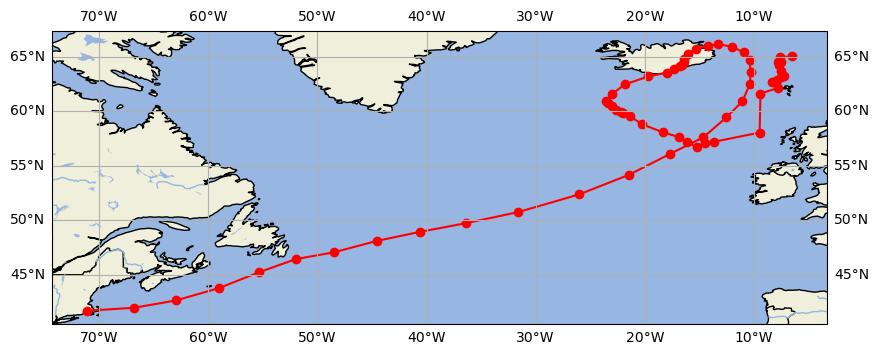

In [45]:
# show the track of the storm on the map

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# plot the longitude and latitude of the storm
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
#ax.set_extent([LONE, LONW, LATS, LATN])

ax.plot(lonx, latx, color='red', marker='o', transform=ccrs.PlateCarree())

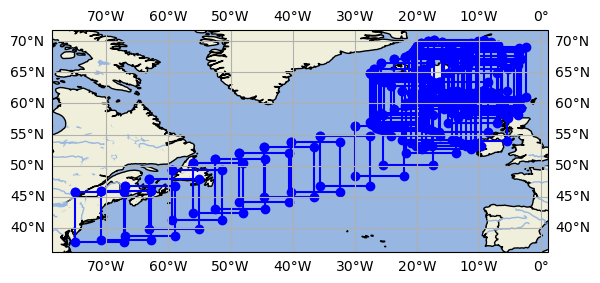

In [46]:
# plot the 62 squares around the storm and plot it on the map
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

for i in range(62):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


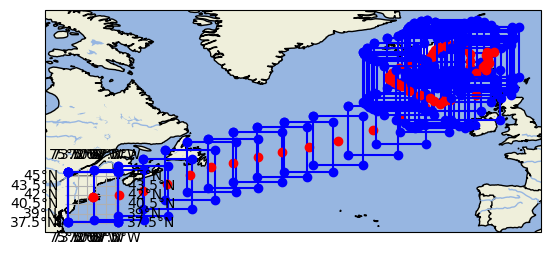

In [60]:
# make a gif of the storm and the 62 squares around it

# make a function
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

def animate(i):
    LONE, LONW, LATN, LATS = tc_irad[i, :]
    ax.plot([LONE, LONE, LONW, LONW, LONE], [LATS, LATN, LATN, LATS, LATS], color='blue', marker='o', transform=ccrs.PlateCarree())
    ax.plot(lonx[i], latx[i], color='red', marker='o', transform=ccrs.PlateCarree())
    return ax

anim = FuncAnimation(fig, animate, frames=62, interval=200)
anim.save('storm.gif', dpi=80, writer='imagemagick')


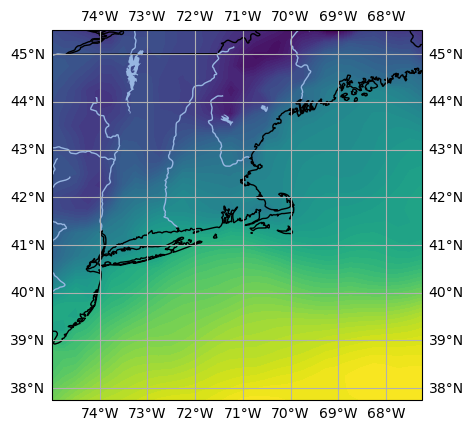

In [55]:
# plot the d2m variable in 3 squares (first step, middle step, last step)

# first step
first_step = first_storm.isel(time=0)
first_step = first_step['d2m']
#first_step = first_step.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))
#first_step = first_step - 273.15

# middle step
middle_step = first_storm.isel(time=5)
middle_step = middle_step['d2m']
#middle_step = middle_step.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))
#middle_step = middle_step - 273.15

# last step
last_step = first_storm.isel(time=10)
last_step = last_step['d2m']
#last_step = last_step.sel(latitude=slice(LATS,LATN), longitude=slice(LONE,LONW))
#last_step = last_step - 273.15

# plot the 3 steps into a map

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.gridlines(draw_labels=True)

ax.contourf(first_step.longitude, first_step.latitude, first_step, 60, transform=ccrs.PlateCarree())
plt.show()